In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

# Q1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

#### Importing dataset and preliminary EDA

In [3]:
df = pd.read_csv('Fever.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


#### Checking info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


From the data we can observe the following: -
- There are 36 non null values and each variable is numeric, but we need to treat some of them as sublevels.
- There are two factor variables A and B, or rather two treatment levels A and B
- The target variable is the relief variable
- The treatments are performed on the target variable and relief is observed

In [66]:
# Checking for missing values
print('NULL Values:',df.isnull().sum().sum())

NULL Values: 0


In [5]:
# Checcking sub levels in the treatments
print('No of unique values in column A: ',df.A.unique())
print('No of unique values in column B:',df.B.unique())

No of unique values in column A:  [1 2 3]
No of unique values in column B: [1 2 3]


In [61]:
# Checking value counts 
print('Treatment levels A: -')
print(df.A.value_counts())
print('\nTreatment levels B: -') 
df.B.value_counts()

Treatment levels A: -
3    12
2    12
1    12
Name: A, dtype: int64

Treatment levels B: -


3    12
2    12
1    12
Name: B, dtype: int64

In [74]:
print('No of volunteers of each type')
df.Volunteer.value_counts()

No of volunteers of each type


4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

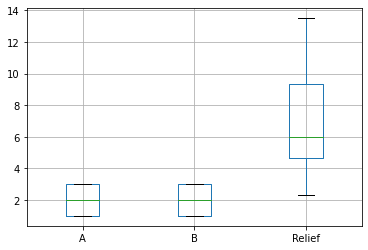

In [71]:
df.boxplot(column = ['A','B','Relief']);

In [63]:
# Checcking shape
print('The data has',df.shape[0],'rows and',df.shape[1],'columns')

The data has 36 rows and 4 columns


#### Assumuptions for ANOVA

- Randomization
- Normality
- Homogenity

#### Normality Test for relief variable: 

p value: 0.02178293839097023
P value<.05, Reject NULL, Distribuition not Normal


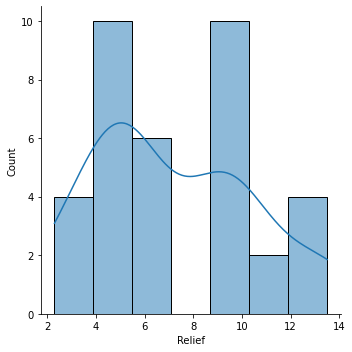

In [23]:
# Shapiro tests NULL Hypothesis: Normal distribution
# Shapiro test Alternate hypothesis Alternate hypothesis: Not Normal Distribution
from scipy.stats import shapiro
w,p = shapiro(df.Relief)
print('p value:',p)
print('P value<.05, Reject NULL, Distribuition not Normal')
sns.displot(df.Relief,kde = True);

- As per rules we can't move ahead with ANOVA as the distribution of the dependent variable is not normal
- Keeping in mind the central limit theorem, more data must be added so that the distribution will tend towards Normal

#### HYPOTHESIS FOR A: -
- Since there are two treatments with 3 sublevels each, the hypothesis goes like this: -
- NULL: mu1 = mu2 = mu3 i.e. The average relief due to the three levels in variable A is same
- Alternative: mu1!=mu2!=mu3 or mu!=mu2=mu3 or mu1=mu2!=mu3 or mu1!=mu2!=mu3, i.e. atleast one pair of means is unequal

#### HYPOTHESIS FOR B: -
- There are 3 sublevels in B as well
- NULL: mu1 = mu2 = mu3 i.e. The average relief due to the three levels in variable B is same
- Alternative: mu1!=mu2!=mu3 or mu!=mu2=mu3 or mu1=mu2!=mu3 or mu1!=mu2!=mu3, i.e. atleast one pair of means is unequal

# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [86]:
# Converting A to categorical
df.A = pd.Categorical(df.A)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     int64   
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 1.1 KB


In [46]:
# Generating formula
formula1 = 'Relief~C(A)'
model1 = ols(formula1,df).fit()
aov_tabA = anova_lm(model1)
aov_tabA

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


In [26]:
# Checking F critical
import scipy.stats as stats
stats.f.ppf(.95,2,33)

3.2849176510382883

In [40]:
# Checking Tukey HSD for A
import statsmodels.stats.multicomp as mcomp
mc = mcomp.MultiComparison(df['Relief'],df['A'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


 - F value is 23.46 and PR is 4.5e-07
 - F critical is 3.28 while PR critical is .05
 - Fvalue>F critical: Implying that the variance between is 23.4 times the variance within.
 - Also P value<<<.05
 - We can clearly state that we can reject the null hypothesis with more than 99 % confidence
 - Hence We have evidence that treatment A has significant affect of the relief variable
 - Initiall our null hypothesis for A was, mean relief in hours due to Ingredient A sublevels 1 2 and 3 is same, while the ALTERNATE was, atleast one pair was different
 
- After performing the tukey HSD on A we can see that, the means are same only for level 2 and level 3, i.e. mu2=mu3, and thats   why we fail to reject the NULL hypothesis


# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [89]:
# Converting B to categorical
df.B = pd.Categorical(df.B)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [45]:
formula2 = 'Relief~C(B)'
model2 = ols(formula2,df).fit()
aov_tabB = anova_lm(model2)
aov_tabB

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN


In [28]:
# Checking F critical
import scipy.stats as stats
stats.f.ppf(.95,2,33)

3.2849176510382883

In [41]:
# Checking Tukey HSD for B
mc = mcomp.MultiComparison(df['Relief'],df['B'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------


- F value is 8.12 and PR is 4.5e-07
- F critical is 3.28 while PR critical is .05
- Fvalue>F critical: Implying that the variance between is 8.12 times the variance within.
- Also P value<<<.05
- We can clearly state that we can reject the null hypothesis with more than 99 % confidenc
- Hence We have evidence that treatment B has significant affect of the relief variable
- After performing Tukey HSD on B we can see that: -
- For sublevels 2 and 3 the means are same i.e. mu2 = mu3, thats' why we fail to reject the NULL hypothesis

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments?


In [40]:
# Using pointplot from seaborn

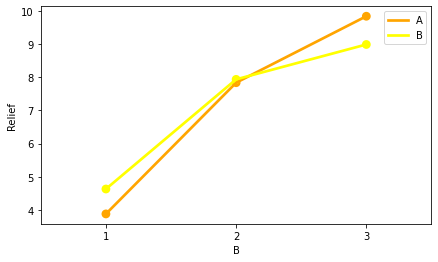

In [69]:
plt.figure(figsize = (7,4))
a = sns.pointplot(x=df.A, y=df.Relief,ci = None,color='orange');
b = sns.pointplot(x=df.B, y=df.Relief, ci = None,color='yellow');
plt.legend(["A","B"])

- An interaction tells if in anyway the variables interact with each other affecting the target value
- As can be seen from the plot, there seems a significant interaction, as the lines overlap

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

In [44]:
# Generating formula for 2 way Anova
formula = 'Relief ~ C(A)+C(B)+C(A):C(B)'
model = ols(formula,df).fit()
aov = anova_lm(model)
aov

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


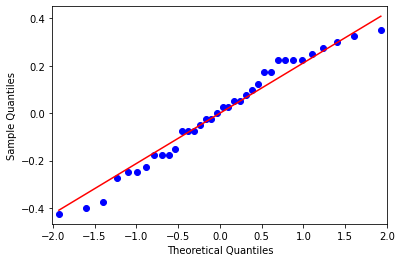

In [60]:
# Checking Normal distribution

import statsmodels.api as sm
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#### There is very negligible deviation, and hence we can conclude that the variables are normally distributed

In [53]:
# Comparing without interaction: -
# Only A
aov_tabA

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


In [54]:
#Only B

aov_tabB

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN


In [56]:
# A and B with interaction effect
aov

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


- As we can observe that after the Interaction has been added the two variables have become even more significant
- Now we can reject the NULL hypothesis with 99.9999..... %

# 1.6) Mention the business implications of performing ANOVA for this particular case study.

In [90]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [42]:
formula3 = 'Relief~C(A)+C(B)+C(A):C(B)'
model3 = ols(formula3,df).fit()
aov_v = anova_lm(model3)
aov_v

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


- The variables are normally distributed as observed from the qq plot
- Both the ingredients A and B play a significant role for the target variable Relief
- Coming to sublevels 1,2 and 1,3 are particularly significant, while 2,3 turn out to be insignificant.
- Also the combination of A and B is much of significant value.
- ANOVA has clearly made us aware about the cause effect relation of the ingredients on the target variable.
- ANOVA in a way has proved tha validity of the experiment, and how the variables considered are siginificant.
- While considering the target variable, we know beforehand what are the significant factors
- Thus accordingly we can increase the effectiveness of the medicine and even increase the relief hours
- For eg we now know that mu2 = mu3 in both treatments A and B, thus while taking the combination into picture, it would be better if we avoid these two sublevels, as they are not significant


###### DOUBTS

- For 1.4 DO WE HAVE TO FIND THE P VALUE FOR THE INTERACTION AS WELL?

In [72]:
df.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [75]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [78]:
df.A = df.A.to_string()

In [81]:
df.B = df.B.to_string()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     object 
 1   B          36 non-null     object 
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [6]:
df.A = df.A.astype('str')
df.B = df.B.astype('str')

In [8]:
df["AB"] = df.A + ":" + df.B